<a href="https://colab.research.google.com/github/shadee22/churn-detectoin-using-machine-learning/blob/main/churn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns



In [4]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc30e7f8190>,
      dtype=object)

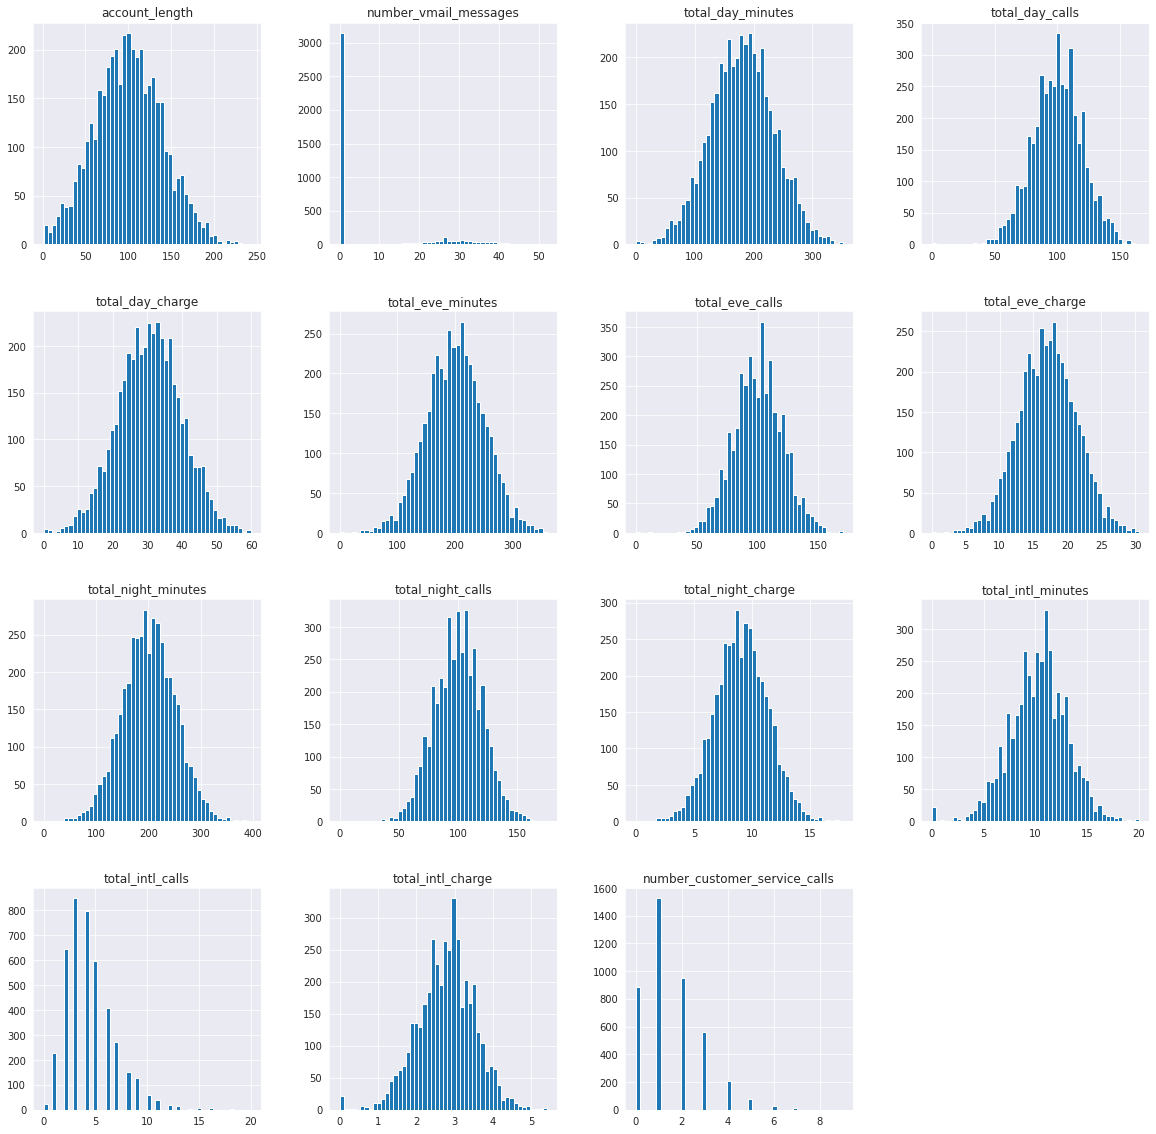

In [7]:
train.head()
import seaborn as sns
sns.set_style('dark')
train.hist(bins = 50 , figsize =(20,20) )

In [21]:
train.state = pd.Categorical(train.state).codes
train.area_code = pd.Categorical(train.area_code).codes
train.international_plan = pd.Categorical(train.international_plan).codes
train.voice_mail_plan = pd.Categorical(train.voice_mail_plan).codes
train.churn = pd.Categorical(train.churn).codes
test.state = pd.Categorical(test.state).codes
test.area_code = pd.Categorical(test.area_code).codes
test.international_plan = pd.Categorical(test.international_plan).codes
test.voice_mail_plan = pd.Categorical(test.voice_mail_plan).codes

In [23]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [30]:
xtrain = train.drop('churn',axis=1)
ytrain = train.churn

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [32]:
xtrain.number_vmail_messages = scaler.fit_transform(xtrain.number_vmail_messages.values.reshape(-1,1))
test.number_vmail_messages = scaler.fit_transform(test.number_vmail_messages.values.reshape(-1,1))


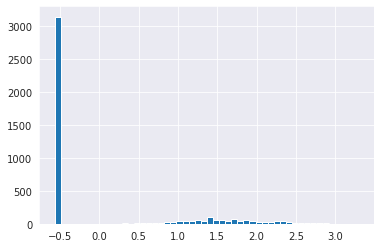

In [33]:
xtrain.number_vmail_messages.hist(bins =50)


In [37]:
light = LGBMClassifier(n_estimators=200,learning_rate=0.11,
                      min_child_samples=30,num_leaves=60)
light.fit(xtrain , ytrain)

LGBMClassifier(learning_rate=0.11, min_child_samples=30, n_estimators=200,
               num_leaves=60)

In [40]:
plt.rcParams["figure.figsize"] = (14, 7)


In [39]:
import matplotlib.pyplot as plt

In [42]:
pred = light.predict(test)

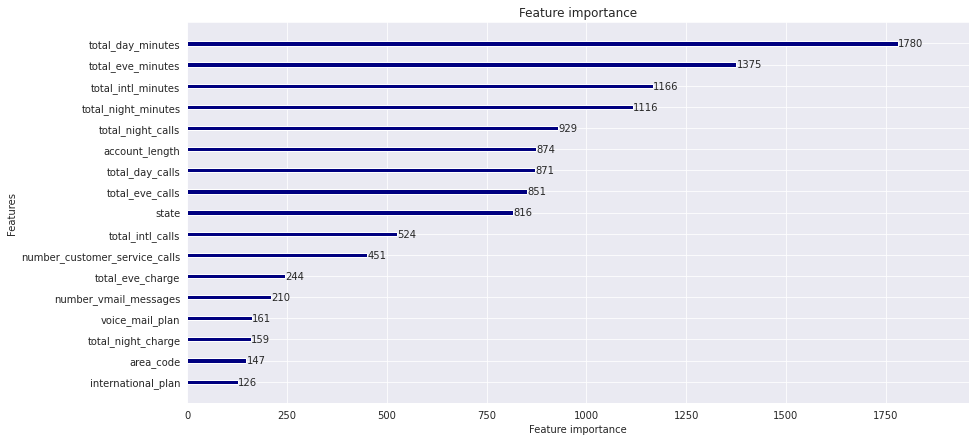

In [43]:
plot_importance(light,color='navy',)

In [44]:
test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,1.172240,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,-0.599015,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,-0.599015,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,-0.599015,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,-0.599015,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,130,1,0,0,-0.599015,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,47,73,0,0,0,-0.599015,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,49,152,1,0,0,-0.599015,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,7,61,1,0,0,-0.599015,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
